In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
dataset = pd.read_csv('Titanic dataset.csv')

In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

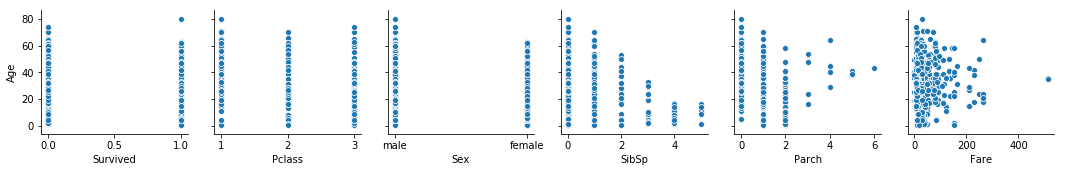

In [6]:
sns.pairplot(dataset,y_vars=['Age'],x_vars=['Survived','Pclass','Sex','SibSp','Parch','Fare'])

In [7]:
dataset.groupby('SibSp')['Age'].median()

SibSp
0    29.0
1    30.0
2    23.0
3     9.5
4     6.5
5    11.0
8     NaN
Name: Age, dtype: float64

In [8]:
dataset[dataset['SibSp']==1]['Age'].median()

30.0

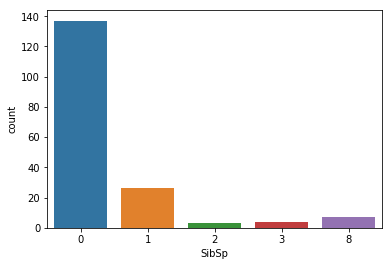

In [9]:
sns.countplot(x='SibSp',data=dataset[dataset['Age'].isnull()])

In [10]:
dataset['Age'].median()

28.0

In [11]:
dataset['Age'] = np.where((dataset['SibSp']==8) & (dataset['Age'].isnull()),28,dataset['Age'])

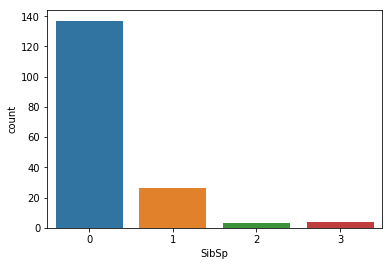

In [12]:
sns.countplot(x='SibSp',data=dataset[dataset['Age'].isnull()])

In [13]:
dataset['Age'] = np.where((dataset['SibSp']==0) & (dataset['Age'].isnull()),29,dataset['Age'])
dataset['Age'] = np.where((dataset['SibSp']==1) & (dataset['Age'].isnull()),30,dataset['Age'])
dataset['Age'] = np.where((dataset['SibSp']==2) & (dataset['Age'].isnull()),23,dataset['Age'])
dataset['Age'] = np.where((dataset['SibSp']==3) & (dataset['Age'].isnull()),9.5,dataset['Age'])

In [14]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
dataset['Embarked'].fillna('S',inplace=True)

In [17]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [18]:
dataset.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)

In [19]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

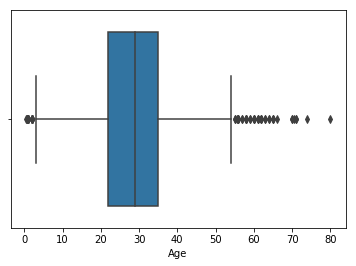

In [20]:
sns.boxplot(dataset['Age'])

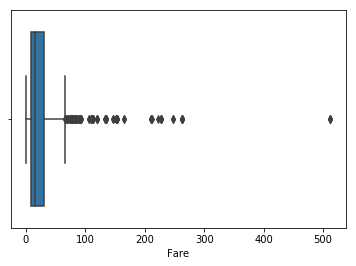

In [21]:
sns.boxplot(dataset['Fare'])

In [22]:
dataset.drop(dataset[dataset['Fare']>500].index,inplace=True)

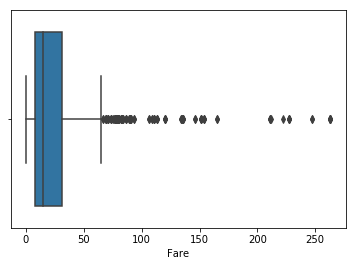

In [23]:
sns.boxplot(dataset['Fare'])

In [24]:
dataset.shape

(888, 8)

In [25]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
numerical_cols = dataset.select_dtypes(include=[np.number]).columns

In [27]:
numerical_cols

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [28]:
numerical_df = dataset.select_dtypes(include=[np.number]).copy()

In [29]:
numerical_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [30]:
character_df = dataset.select_dtypes(include='object').copy()

In [31]:
character_df.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [32]:
dummies_df = pd.get_dummies(character_df,drop_first=True)
dummies_df.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [33]:
combined_df = pd.concat([numerical_df,dummies_df],axis=1)

In [34]:
combined_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [37]:
y = combined_df['Survived']

In [41]:
combined_df['Survived'].value_counts()

0    549
1    339
Name: Survived, dtype: int64

In [38]:
x = combined_df.drop(columns='Survived')

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y, train_size=0.7,random_state=1)

In [40]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [42]:
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
y_pred = model.predict(x_test)

In [44]:
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test,y_pred)

0.7902621722846442

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier(n_neighbors = 3 , metric = 'euclidean')

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
sc = StandardScaler()

In [55]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [56]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [57]:
y_pred = knn.predict(x_test)

In [58]:
accuracy_score(y_test,y_pred)

0.7865168539325843